In [1]:
# Including Libraries
# necessary imports
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
import itertools
import numpy as np
import seaborn as sb
import pickle
from nltk.corpus import wordnet

In [2]:
#We will import the file through the pandas 
TrueNews = pd.read_csv("True.csv")
FakeNews = pd.read_csv("Fake.csv")
#Let's check our data
print(TrueNews.head(5))
#print(FakeNews.head(5))

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   


In [3]:
#Checking shape for both files
print(TrueNews.shape)
print(FakeNews.shape)

(21417, 4)
(23481, 4)


In [4]:
print('FAKE',FakeNews.isnull().sum())
print('TRUE',TrueNews.isnull().sum())

FAKE title      0
text       0
subject    0
date       0
dtype: int64
TRUE title      0
text       0
subject    0
date       0
dtype: int64


In [5]:
#Columns Print
print(list(TrueNews.columns))
print(list(FakeNews.columns))

['title', 'text', 'subject', 'date']
['title', 'text', 'subject', 'date']


In [6]:
#We are adding label fake and true
TrueNews['label'] = 'True'
TrueNews.head(5)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [7]:
FakeNews['label'] = 'Fake'
FakeNews.head(5)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [8]:
TrueNews.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [9]:
#Let's concatenate the dataframes
frames = [TrueNews, FakeNews]
news_dataset = pd.concat(frames)
news_dataset

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake


In [10]:
#New combined dataset 
news_dataset.describe()

,title,text,subject,date,label
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",Fake
freq,14,627,11272,182,23481


In [11]:
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


In [12]:
final_data = news_dataset.dropna()

In [13]:
final_data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [14]:
# Removing the date 
final_data.drop(["date"],axis=1,inplace=True)
final_data.head()

,title,text,subject,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,True


In [15]:
# Removing the title
final_data.drop(["title"],axis=1,inplace=True)
final_data.head()

,text,subject,label
0,WASHINGTON (Reuters) - The head of a conservat...,politicsNews,True
1,WASHINGTON (Reuters) - Transgender people will...,politicsNews,True
2,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,True
3,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,True
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,True


In [16]:
#First lets convert our data into lower case 
final_data['text'] = final_data['text'].apply(lambda x: x.lower())
#final_data['title'] = final_data['title'].apply(lambda x: x.lower())
final_data.head()

,text,subject,label
0,washington (reuters) - the head of a conservat...,politicsNews,True
1,washington (reuters) - transgender people will...,politicsNews,True
2,washington (reuters) - the special counsel inv...,politicsNews,True
3,washington (reuters) - trump campaign adviser ...,politicsNews,True
4,seattle/washington (reuters) - president donal...,politicsNews,True


In [17]:
# Drop odd rows
#final_data = final_data.iloc[::2]

In [18]:
#New combined dataset 
final_data.describe()

,text,subject,label
count,44898,44898,44898
unique,38646,8,2
top,,politicsNews,Fake
freq,627,11272,23481


In [19]:
# Drop odd rows
#final_data = final_data.iloc[::2]

In [20]:
#New combined dataset 
final_data.describe()

,text,subject,label
count,44898,44898,44898
unique,38646,8,2
top,,politicsNews,Fake
freq,627,11272,23481


In [21]:
#Removing punctuation
import string

def remove_punctuation(text):
    #all_list = [char for char in text if char not in string.punctuation]
    #no_punct = ''.join(all_list)
    translator = str.maketrans('', '',string.punctuation)
    no_punct = text.translate(translator)
    return no_punct

final_data['text'] = final_data['text'].apply(remove_punctuation)

In [22]:
# Verifying
final_data.head()

,text,subject,label
0,washington reuters the head of a conservative...,politicsNews,True
1,washington reuters transgender people will be...,politicsNews,True
2,washington reuters the special counsel invest...,politicsNews,True
3,washington reuters trump campaign adviser geo...,politicsNews,True
4,seattlewashington reuters president donald tr...,politicsNews,True


In [23]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

final_data['text'] = final_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
final_data.head()

,text,subject,label
0,washington reuters head conservative republica...,politicsNews,True
1,washington reuters transgender people allowed ...,politicsNews,True
2,washington reuters special counsel investigati...,politicsNews,True
3,washington reuters trump campaign adviser geor...,politicsNews,True
4,seattlewashington reuters president donald tru...,politicsNews,True


In [25]:
# Suffle the datasets randomly
final_data = final_data.sample(frac = 1)

In [26]:
final_data.head()

,text,subject,label
8718,new york reuters hillary clinton promised mond...,politicsNews,True
18684,cox bazar bangladeshunited nations reuters 60 ...,worldnews,True
2179,charlottesville va reuters two people say inju...,politicsNews,True
18148,kuala lumpur reuters lawyers two women accused...,worldnews,True
1515,washington reuters us senator wednesday said r...,politicsNews,True


In [27]:
final_data.describe()

,text,subject,label
count,44898,44898,44898
unique,38636,8,2
top,,politicsNews,Fake
freq,632,11272,23481


In [28]:
final_data.to_csv('final_data.csv')

In [29]:
# Function to plot the confusion matrix 
# This function prints and plots the confusion matrix
# Normalization can be applied by setting 'normalize=True'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [30]:
x = final_data['text']
y = final_data['label']

In [31]:
num_true = len(final_data[final_data['label'] == 'True'])
num_fake = len(final_data[final_data['label'] == 'Fake'])

In [32]:
# Print the results
print('Number of true datasets:', num_true)
print('Number of fake datasets:', num_fake)

Number of true datasets: 21417
Number of fake datasets: 23481


In [33]:
# Convert the class labels from strings to integers
y = np.array([1 if label == "True" else 0 for label in y])

In [34]:
print(y)

[1 1 1 ... 0 0 1]


In [61]:
final_data.head(5)

,text,subject,label
8718,new york reuters hillary clinton promised mond...,politicsNews,True
18684,cox bazar bangladeshunited nations reuters 60 ...,worldnews,True
2179,charlottesville va reuters two people say inju...,politicsNews,True
18148,kuala lumpur reuters lawyers two women accused...,worldnews,True
1515,washington reuters us senator wednesday said r...,politicsNews,True


In [62]:
final_data.tail(5)

,text,subject,label
17516,thank goodness finally president refuses dump ...,left-news,Fake
17575,beirut reuters turkey military begun setting o...,worldnews,True
21555,tell us susan worse iran nuclear weapon billio...,left-news,Fake
19870,former muslim donald trump supporter fled isla...,left-news,Fake
1227,moscow reuters politicians north south korea h...,politicsNews,True


In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [64]:
# Transform the training data into bag of words features using the CountVectorizer
count_vectorizer = CountVectorizer()

x_train_bow = count_vectorizer.fit_transform(x_train)

In [65]:
print(x_train)

2434     las vegas reuters us congressional panel week ...
15294    husband turns 69 bill clinton gets heckled bun...
19878    beirut reuters military alliance fighting toge...
5379     police officer texas caught video making racis...
5163     washington reuters us attorney general jeff se...
                               ...                        
13063    president obama clearly quite ready go gentle ...
23184    21st century wire says amid great mainstream m...
3421     revelations russia giant hand influencing elec...
13075    moscow reuters russia designated radio free eu...
17501    washington reuters us military said friday ide...
Name: text, Length: 35918, dtype: object


In [66]:
print(x_test)

15509    istanbul reuters turkish prosecutor issued det...
14560    trump winning support latinos union members tw...
5866     wake horrific orlando shooting targeted lgbtq ...
17869    first thing comes mind think hillary clinton r...
12328                              httpsyoutube0j4xprybslu
                               ...                        
9525     los angeles reuters federal appeals court mond...
19876    office immigration statistics reported 188382 ...
6846     new york reuters donald trump clashed wednesda...
13730    listen main stream media biaswhile democrats 7...
18178    president trump put north korea brutal dictato...
Name: text, Length: 8980, dtype: object


In [67]:
# Transform the test data into bag of words features using the CountVectorizer

x_test_bow = count_vectorizer.transform(x_test)

In [68]:
# Get the feature names of 'count_vectorizer'

print(count_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '000000017', '000004', '000048', '000063sz', '00007', '00009', '0001']


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [102]:
from collections import defaultdict
from scipy.sparse import csr_matrix

def train_naive_bayes(X, y, alpha=2.0):
    # Convert X to a sparse matrix
    X_sparse = csr_matrix(X)
    #print(X_sparse)
    
    # Calculate the number of fake and real news articles in the training set
    num_real = y.sum()
    print(num_real)
    num_fake = len(y) - num_real
    print(num_fake)
    
    # Calculate the probability of a news article being fake or real
    p_fake = (num_fake + alpha) / (len(y) + 2 * alpha)
    print(p_fake)
    p_real = (num_real + alpha) / (len(y) + 2 * alpha)
    print(p_real)
    
    # Calculate the probability of each word appearing in a fake or real news article
    fake_word_probs = defaultdict(int)
    real_word_probs = defaultdict(int) # This could have been initilized with the {} but it will throw and key error as the dictonary is empty
    for i in range(X_sparse.shape[0]):
        article = X_sparse[i, :]
        words = article.nonzero()[1]
        for index in words:
            if y[i] == 1:  # News article is fake
                fake_word_probs[index] += 1
            else:  # News article is real
                real_word_probs[index] += 1
    
    # Normalize the word counts to obtain probabilities
    for word in fake_word_probs:
        fake_word_probs[word] = (fake_word_probs[word] + alpha) / (num_fake + 2 * alpha)
    for word in real_word_probs:
        real_word_probs[word] = (real_word_probs[word] + alpha) / (num_real + 2 * alpha)
    
    # Save the trained model using pickle
    model = {"p_fake": p_fake, "p_real": p_real, "fake_word_probs": fake_word_probs, "real_word_probs": real_word_probs}
    with open("naive_bayes_model.pkl", "wb") as f:
        pickle.dump(model, f)
        
    return p_fake, p_real, fake_word_probs, real_word_probs


def predict_fake_news(X, p_fake, p_real, fake_word_probs, real_word_probs, alpha=2.0):
    y_pred = []
    num_fake = 0
    num_real = 0
    for i in range(X.shape[0]):
        article = X[i, :]
        p_real_article = 1.0
        p_fake_article = 1.0
        words = article.nonzero()[1] # it is more efficient than -> words = article.indices
        for index in words:
            if index in fake_word_probs:
                p_fake_article *= fake_word_probs[index]
            else:
                p_fake_article *= alpha / (num_fake + 2 * alpha)
            if index in real_word_probs:
                p_real_article *= real_word_probs[index]
            else:
                p_real_article *= alpha / (num_real + 2 * alpha) # This is used for laplace smoothing as the probability is set to 0.5 assuming that the world can occur in both real or fake news
        
        
        # Calculate the probability that the news article is fake or real
        p_fake_article *= p_fake
        p_real_article *= p_real
        
        # Predict the class label of the news article
        if p_fake_article > p_real_article :
            y_pred.append(1)
        else:
            y_pred.append(0)
        
        if y_pred[-1] == 1:
            num_fake += 1
        else:
            num_real += 1
            
    #accuracy = num_correct / X.shape[0]
    return np.array(y_pred)

In [78]:
#alphas = [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3,5, 4, 4.5, 5, 5.5, 6, 6.5, 10]
#accuracies = []

In [103]:
# Train the Naive Bayes classifier
p_fake, p_real, fake_word_probs, real_word_probs = train_naive_bayes(x_train_bow, y_train)

17178
18740
0.521741551138578
0.478258448861422


In [104]:
# Predict the class labels of the test set
y_pred = predict_fake_news(x_test_bow, p_fake, p_real, fake_word_probs, real_word_probs)

In [105]:
print(y_pred)

[1 0 0 ... 1 0 1]


In [106]:
print(y_test)

[1 0 0 ... 1 0 0]


In [107]:
# Evaluate the performance of the classifier
accuracy = np.mean(y_pred == y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 80.11%


In [108]:
np.unique(y_test)

array([0, 1])

Confusion matrix, without normalization


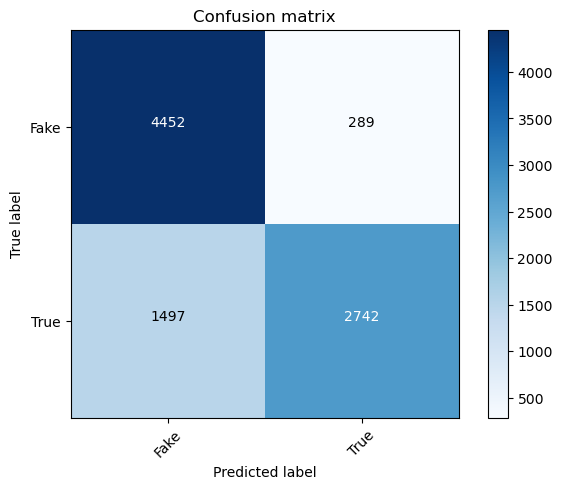

In [109]:
cm1 = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
plot_confusion_matrix(cm1, classes=['Fake', 'True'])

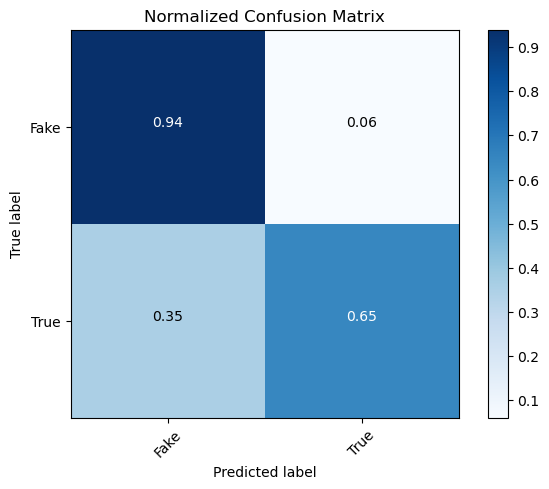

In [110]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

# calculate confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1], normalize='true')

# plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(['0', '1']))
plt.xticks(tick_marks, ['Fake', 'True'], rotation=45)
plt.yticks(tick_marks, ['Fake', 'True'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# add labels to cells
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, '{:.2f}'.format(cm[i, j]),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()


In [111]:
print(cm1)

[[4452  289]
 [1497 2742]]


In [112]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83      4741
           1       0.90      0.65      0.75      4239

    accuracy                           0.80      8980
   macro avg       0.83      0.79      0.79      8980
weighted avg       0.82      0.80      0.80      8980



In [113]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

In [114]:
# get feature names

# Get the feature names of 'tfidf_vectorizer'

print(tfidf_vectorizer.get_feature_names()[-10:])

['zynga', 'zypries', 'zyries', 'zyuganov', 'zz', 'zzbluecomet', 'zzzzaaaacccchhh', 'zzzzzzzz', 'zzzzzzzzzzzzz', 'émigré']


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [115]:
# Train the Naive Bayes classifier
p_fake, p_real, fake_word_probs, real_word_probs = train_naive_bayes(tfidf_train, y_train)

17178
18740
0.521741551138578
0.478258448861422


In [116]:
# Predict the class labels of the test set
tfidf_pred = predict_fake_news(tfidf_test, p_fake, p_real, fake_word_probs, real_word_probs)

In [117]:
# Evaluate the performance of the classifier
accuracy = np.mean(tfidf_pred == y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 79.84%


Confusion matrix, without normalization


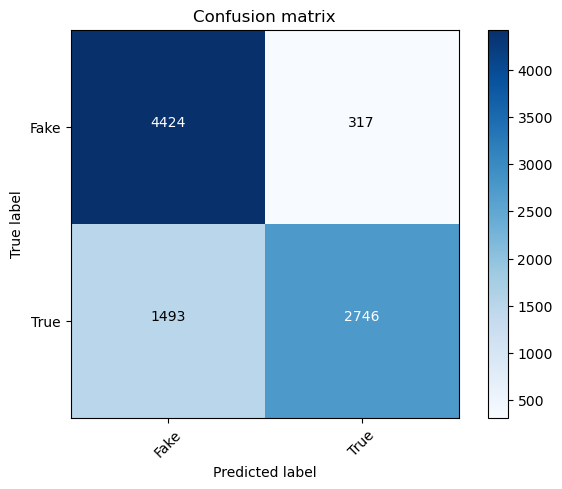

In [118]:
cm1 = metrics.confusion_matrix(y_test, tfidf_pred, labels=[0, 1])
plot_confusion_matrix(cm1, classes=['Fake', 'True'])

In [94]:
print(cm1)

[[4526  175]
 [1450 2829]]


In [95]:
print(metrics.classification_report(y_test, tfidf_pred))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85      4701
           1       0.94      0.66      0.78      4279

    accuracy                           0.82      8980
   macro avg       0.85      0.81      0.81      8980
weighted avg       0.85      0.82      0.81      8980



In [97]:
# Save the tfidf_vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)


In [98]:
var = input("Please enter the news text you want to verify: ")
# function to run for prediction
def detecting_fake_news(var):  
    #retrieving the best model for prediction call
    # Load the saved model
    with open('naive_bayes_model.pkl', 'rb') as file:
        model_train = pickle.load(file)
        
    # Load the vecrotizer 
    with open('tfidf_vectorizer.pkl', 'rb') as file:
        model_vectorizer = pickle.load(file)
  
    # Convert the input to a 2-dimensional array with shape (1, num_features)
    X = model_vectorizer.transform([var])
    
    # Predict the class label of the new data
    prediction = predict_fake_news(X, model_train["p_fake"], model_train["p_real"], 
                            model_train["fake_word_probs"], model_train["real_word_probs"])

    return (print("The given statement is ",prediction[0]))

if __name__ == '__main__':
    detecting_fake_news(var)

Please enter the news text you want to verify: The US Navy has sent a destroyer close to a contested island in the South China Sea that Beijing has fortified with military installations to stake its territorial claims on the region.  The sailing came as the Chinese military entered a third day of a show of force around Taiwan, a thousand miles away near the northern entrance to the South China Sea, in response to a brief visit by Taiwan’s President to the United States.  On Monday, a statement from the US Navy’s 7th Fleet said the guided-missile destroyer USS Milius passed within 12 nautical miles – the internationally recognized limit of a nation’s territorial waters – of Mischief Reef in the Spratly islands, known as the Nansha Islands in China.  Mischief Reef, which lies in the Philippines Exclusive Economic Zone, is also claimed by Vietnam and Taiwan. But Beijing has asserted its claims to the island by building it up and placing military infrastructure on it.  The US contends such

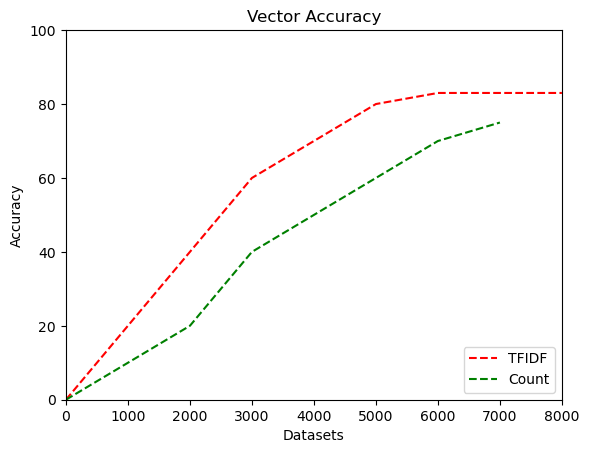

In [125]:
# Set the x-axis values
x = np.linspace(0, 8000, num=9)

# Set the y-axis values
y_1 = np.array([0, 20, 40, 60, 70, 80, 83, 83, 83])
y_2 = np.array([0, 10, 20, 40, 50, 60, 70, 75])

# Plot the line graph
fig, ax = plt.subplots()
ax.plot(x, y_1, 'r--', label='TFIDF')
ax.plot(x[:-1], y_2, 'g--', label='Count')
ax.set_xlim([0, 8000])
ax.set_ylim([0, 100])
ax.set_xlabel('Datasets')
ax.set_ylabel('Accuracy')
ax.set_title('Vector Accuracy')
ax.legend(loc='lower right')
plt.show()
